        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


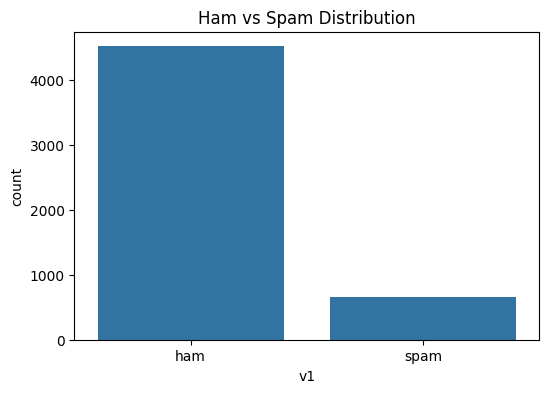

                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          text_clean  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in a wkly comp to win fa cup final ...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  
Matrix Size (rows, cols (words)):
(5169, 5000)
Training set size: 4135
Test set size: 1034

--- Processing Naive Bayes ---
Best Hyperparameters: {'alpha': 0.1}
Accuracy: 0.9768
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95 

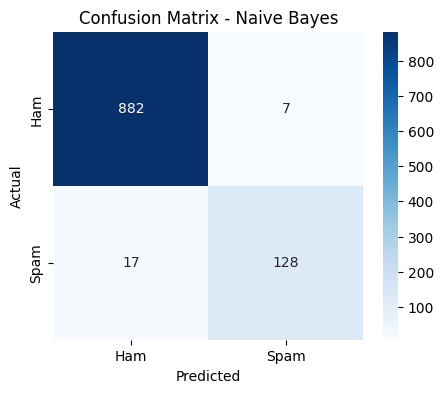


--- Processing Support Vector Machine ---
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.9816
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.89      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



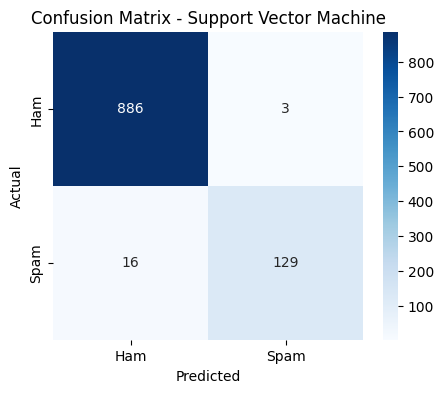

In [1]:
import pandas as pd

# for 1.4
from sklearn.preprocessing import LabelEncoder

# for 1.5 & 2.5
import matplotlib.pyplot as plt
import seaborn as sns

# for 1.6
import re

# for 1.7
from sklearn.feature_extraction.text import TfidfVectorizer

# for 2.2
from sklearn.model_selection import train_test_split

# for 2.3
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# for 2.4 & 2.5
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# task 1.1
df = pd.read_excel("../data/raw/email_spam.xlsx")
print(df)

# task 1.3
# remove useless columns
columns_to_delete = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"];
df = df.drop(columns=columns_to_delete)
print(df.info())

# task 1.2
# remove same string seen twice in the v2 column
df = df.drop_duplicates(subset=['v2'])
print(df.info())

# task 1.4
# encoding column v1
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['v1'])
print(df.head())

# task 1.5
# distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=df)
plt.title('Ham vs Spam Distribution')
plt.show()

# task 1.6
# function that filter text
def clean_text(text):
    # lowercase letters
    text = str(text).lower()
    # keep only the letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # eliminate multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# apply the function created above to filter the v2 column
df['text_clean'] = df['v2'].apply(clean_text)
print(df[['v2', 'text_clean']].head())

# task 1.7
# transform text_clean -> vector
# max 5000 features
tfidf = TfidfVectorizer(max_features=5000)

# learns the vocabulary
X = tfidf.fit_transform(df['text_clean'])
print("Matrix Size (rows, cols (words)):")
print(X.shape)

# task 2.1
# separate features (X) from targer var (y)
y = df['target_encoded']

# task 2.2
# split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# task 2.3 - prepare different models for training
model_params = {
    'Naive Bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# loop through models
for model_name, mp in model_params.items():
    print(f"\n--- Processing {model_name} ---")

    # task 2.3: train models with different hyperparameter combinations using GridSearch
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, n_jobs=-1)
    clf.fit(X_train, y_train)

    # task 2.4: evaluate the best model
    best_model = clf.best_estimator_
    print(f"Best Hyperparameters: {clf.best_params_}")

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # task 2.5: display confusion matrix as a heatmap
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# save processed data for check
df.to_excel("../data/processed/email_spam_processed.xlsx", index=False)